# Setting the Influent in Sumo - Introductory Practice and Example

Import relevant libraries

In [17]:
from dynamita.sumo import *

import numpy
import time
import copy as cp
import matplotlib.pyplot as plt
%matplotlib notebook

In [18]:
sumo = Sumo(sumoPath="C:/Users/Sara/AppData/Local/Dynamita/Sumo19",
           licenseFile=r"C:/Users/Sara/Desktop/sewerWRRF/networklicense.sumolic")

def datacomm_callback(sumo):
    t.append(sumo.core.csumo_var_get_time_double(sumo.handle))
    snhx_effl.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, snhx_effl_pos))
    xtss_effl.append(sumo.core.csumo_var_get_pvt_pos(sumo.handle, xtss_effl_pos))
    return 0

sumo.unload_model()
sumo.load_model('A2O plant.sumo')

sumo.core.csumo_command_send(sumo.handle, b'execute script_Initialize.scs;')

sumo.register_datacomm_callback(datacomm_callback)

snhx_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__SNHx')
xtss_effl_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__Effluent__XTSS')

sumo.set_stopTime(10*24*60*60*1000)
sumo.set_dataComm(50*60*1000)

t = []
snhx_effl = []
xtss_effl = []

sumo.run_model()
while not sumo.simulation_finished:
    time.sleep(0.01)

snhx_effl_noset = cp.deepcopy(snhx_effl)
xtss_effl_noset = cp.deepcopy(xtss_effl)
t_noset = cp.deepcopy(t)

License OK...
No model is loaded


### Run with set to change model variables

Set variables in model

In [29]:
sumo.core.csumo_command_send(sumo.handle, b'set Sumo__Plant__CSTR__XOHO_0 0;')
sumo.core.csumo_command_send(sumo.handle, b'set Sumo__Plant__Sumo1__KNHx_NITO_AS 0;')

1

In [30]:
sumo.set_stopTime(10*24*60*60*1000)
sumo.set_dataComm(50*60*1000)

t = []
snhx_effl = []
xtss_effl = []

sumo.run_model()
while not sumo.simulation_finished:
    time.sleep(0.01)

snhx_effl_set = cp.deepcopy(snhx_effl)
xtss_effl_set = cp.deepcopy(xtss_effl)
t_set = cp.deepcopy(t)

<IPython.core.display.Javascript object>


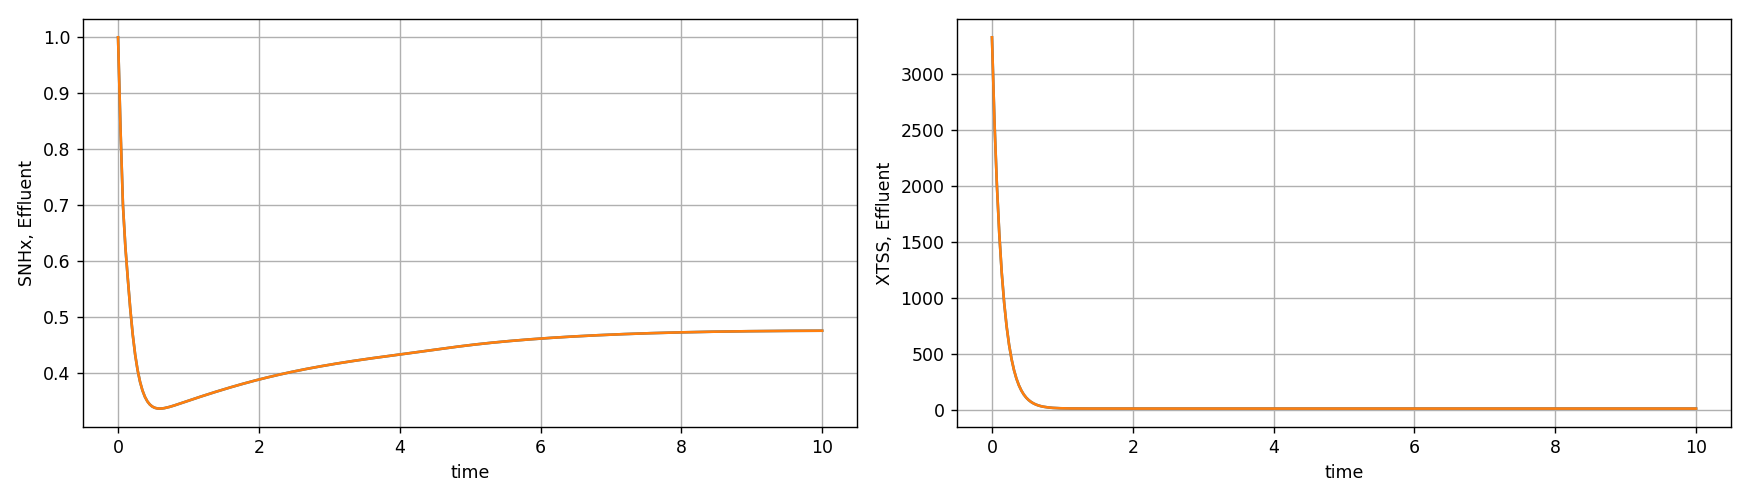

In [31]:
plt.rcParams['axes.grid'] = True

fig, (axs) = plt.subplots(1,2, figsize=(14,4))

axs[0].set_xlabel('time'); axs[0].set_ylabel('SNHx, Effluent')
axs[0].plot(t_noset, snhx_effl_noset)
axs[0].plot(t_set, snhx_effl_set)

axs[1].set_xlabel('time'); axs[1].set_ylabel('XTSS, Effluent')
axs[1].plot(t_noset, xtss_effl_noset)
axs[1].plot(t_set, xtss_effl_set)

plt.tight_layout()